In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(37) # 使得每次运行得到的随机数都一样

In [2]:
# 准备数据集
data_path='E:\PyProjects\DataSet\FireAI/data_perf.txt'
df=pd.read_csv(data_path,header=None)
print(df.info()) # 查看数据信息，确保没有错误
# print('-'*100)
dataset=df.values # 数据加载没有问题
# print(dataset.shape) # (250, 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
0    250 non-null float64
1    250 non-null float64
dtypes: float64(2)
memory usage: 4.0 KB
None


In [3]:
from sklearn.cluster import KMeans
# 构建一个聚类模型，此处用K-means算法
model=KMeans(init='k-means++',n_clusters=3,n_init=10) 
# 原始K-means算法最开始随机选取数据集中K个点作为聚类中心，
# 分类结果会因为初始点的选取不同而有所区别
# 而K-means++算法改变这种随机选取方法，能显著的改善分类结果的最终误差
# 此处我随机的指定n_cluster=3，看看评估结果
model.fit(dataset)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [4]:
# 使用轮廓系数评估模型的优虐
from sklearn.metrics import silhouette_score
si_score=silhouette_score(dataset,model.labels_,
                          metric='euclidean',sample_size=len(dataset))
print('si_score: {:.4f}'.format(si_score))

si_score: 0.5572


In [5]:
# K-means模型的提升
# 在定义K-means时，往往我们很难知道最优的簇群数量，即K值，
# 故而可以通过遍历得到最优值
def get_optimal_K(dataset,K_list=None):
    k_lists=K_list if K_list else range(2,15)
    scores=[]
    for k in k_lists:
        kmeans=KMeans(init='k-means++',n_clusters=k,n_init=10)
        kmeans.fit(dataset)
        scores.append(silhouette_score(dataset,kmeans.labels_,
                                      metric='euclidean',
                                      sample_size=len(dataset)))
    return k_lists[scores.index(max(scores))],scores

In [6]:
optimal_K, scores=get_optimal_K(dataset)
print('optimal_K is: {}, all scores: {}'.format(optimal_K,scores))

optimal_K is: 5, all scores: [0.5290397175472954, 0.5572466391184153, 0.5832757517829593, 0.6582796909760834, 0.5991736976396735, 0.5322879119776307, 0.449508173395592, 0.39397840354687275, 0.3440456115676953, 0.3952847327692998, 0.345864567567443, 0.34342033708925285, 0.3365532994741894]


In [7]:
optimal_K, scores=get_optimal_K(dataset,[2,4,6,8,10,12])
print('optimal_K is: {}, all scores: {}'.format(optimal_K,scores))

optimal_K is: 6, all scores: [0.5290397175472954, 0.5832757517829593, 0.5984130334897403, 0.449005744073786, 0.4112847746670841, 0.41701859328339114]


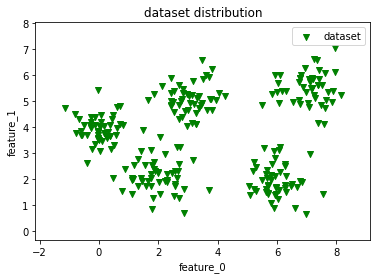

In [8]:
# 无标签数据集可视化，将第一列feature作为X，第二列feature作为y
def visual_2D_dataset_dist(dataset):
    '''将二维数据集dataset显示在散点图中'''
    assert dataset.shape[1]==2,'only support dataset with 2 features'
    plt.figure()
    X=dataset[:,0]
    Y=dataset[:,1]
    plt.scatter(X,Y,marker='v',c='g',label='dataset')
    
    X_min,X_max=np.min(X)-1,np.max(X)+1
    Y_min,Y_max=np.min(Y)-1,np.max(Y)+1
    plt.title('dataset distribution')
    plt.xlim(X_min,X_max)
    plt.ylim(Y_min,Y_max)
    plt.xlabel('feature_0')
    plt.ylabel('feature_1')
    plt.legend()
    
visual_2D_dataset_dist(dataset)

In [9]:
def visual_kmeans_effect(k_means,dataset):
    assert dataset.shape[1]==2,'only support dataset with 2 features'
    X=dataset[:,0]
    Y=dataset[:,1]
    X_min,X_max=np.min(X)-1,np.max(X)+1
    Y_min,Y_max=np.min(Y)-1,np.max(Y)+1
    X_values,Y_values=np.meshgrid(np.arange(X_min,X_max,0.01),
                                  np.arange(Y_min,Y_max,0.01))
    # 预测网格点的标记
    predict_labels=k_means.predict(np.c_[X_values.ravel(),Y_values.ravel()])
    predict_labels=predict_labels.reshape(X_values.shape)
    plt.figure()
    plt.imshow(predict_labels,interpolation='nearest',
               extent=(X_values.min(),X_values.max(),
                       Y_values.min(),Y_values.max()),
               cmap=plt.cm.Paired,
               aspect='auto',
               origin='lower')
    
    # 将数据集绘制到图表中
    plt.scatter(X,Y,marker='v',facecolors='none',edgecolors='k',s=30)
    
    # 将中心点回执到图中
    centroids=k_means.cluster_centers_
    plt.scatter(centroids[:,0],centroids[:,1],marker='o',
                s=100,linewidths=2,color='k',zorder=5,facecolors='b')
    plt.title('K-Means effect graph')
    plt.xlim(X_min,X_max)
    plt.ylim(Y_min,Y_max)
    plt.xlabel('feature_0')
    plt.ylabel('feature_1')
    plt.show()


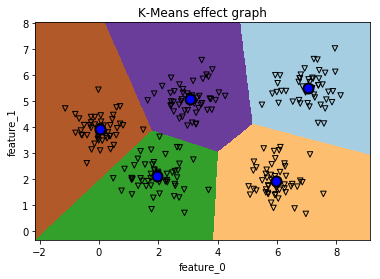

In [10]:
# 使用最优的K值来定义K-means模型，并查看该模型的聚类效果
kmeans=KMeans(init='k-means++',n_clusters=5,n_init=10) # 使用最优的K=5
kmeans.fit(dataset)
visual_kmeans_effect(kmeans,dataset)